# Семинар по градиентному бустингу

## Теоретическая часть

### Предсказания в градиентном бустинге

__Вспомнить из лекции:__
* Что такое градиентный бустинг? Как в нем выполняются предсказания?

#### Вопрос: сколько раз нужно сделать предсказания решающего дерева, чтобы сделать предсказания градиентного бустинга для одного объекта?

__Ответ:__
Предсказания в градиентном бустинге выполняются по формуле композиции с весами: $a(x) = b_0(x)+ \gamma_1 b_1(x) + \dots + \gamma_N b_N(x).$

Базовый алгоритм $b_0(x)$ - это обычно очень простой алгоритм, например, константный. Алгоритмы $b_1(x) \dots b_N(x)$ обучаются согласно процедуре 
обучения градиентного бустинга, которую мы обсудим ниже.

В итоге получается, что для одного объекта $x$ нужно сделать предсказания $N$ базовых алгоритмов - решающих деревьев.

### Обучение градиентного бустинга

__Вспомнить из лекции:__
* На какие целевые переменные настраивается один базовый алгоритм градиентного бустинга при использовании квадратичной функции потерь?
* Как в градентном бустинге выбираются веса базовых алгоритмов?

#### Задача 1.
Дана выборка с пятью объектами и двумя признаками, задача регрессии:

| Признак 1 | Признак 2 | Ответ |
|-----------|-----------|-------|
| 1         | -1        | 0.3   |
| 2         | 1         | -0.4  |
| 3         | 0         | 0.1   |
| 1         | 0         | 0.2   |
| 2         | -1        | -0.8  |

Мы обучаем градиентный бустинг с квадратичной функцией потерь $L(y, z) = (y-z)^2$. Первый базовый алгоритм выбираем очень простым и константным: $b_0(x) = 0$. На какие целевые переменные будет настраиваться второй базовый алгоритм $b_1(x)$?

__Решение.__
В градиентном бустинге каждый следующий алгоритм "дополняет" ответы уже построенной, текущей композиции. В нашем примере уже построенная композиция состоит только из одного алгоритма, которым инициализируется градиентный бустинг: $a(x) = b_0(x)$. Чтобы реализовать логику "дополнения", мы будем менять целевые переменные, на которые настраивается базовый алгоритм. В этом принципиальное отличие градиентного бустинга от предыдущих рассмотренных алгоритмов композиции (бэггинга и случайного леса): в тех алгоритмах мы модифицируем состав объектов в выборке и рассматриваемые признаки, а в градиентном бустинге - целевые переменные, в то время как матрица объекты-признаки не меняется.

В градиентном бустинге базовый алгоритм настраивается на вектор производных функции потерь: $- \frac {\partial L}{\partial z}$, посчитанных для текущей композиции. Дл квадатичной функции потерь:

$$- \frac {\partial L}{\partial z} = - \frac {\partial (y-z)^2}{\partial z} = -2(z-y) = 2(y-z).$$

Вместо $z$ нужно подставить текущую композицию, то есть $z=b_0(x)$. У нас $b_0(x)=0$, поэтому алгоритм $b_1(x)$ будет настраиваться на вектор, состоящий из $2y$ для каждого объекта. Составляем вектор из столбца "Ответ": $(0.6, -0.8, 0.1, 0.2, -1.6)$ - это ответ.

Алгоритму $b_1(x)$ все равно, на какой целевой вектор обучаться - на исходный или на полученный в задаче. В градиентном бустинге используют этот факт, чтобы следующие базовые алгоритмы могли "дополнять" предсказания предыдущих. В нашей задаче нужно также подобрать вес $\gamma_1$ алгоритма $b_1(x)$. Предположим, что у нас получился вес $\gamma_1=0.5$. Тогда предсказания композиции будут выполняться по формуле $b_0(x) + 0.5 b_1(x)$.

__Обратите внимание:__ при составлении целевого вектора для $b_1(x)$ мы не использовали матрицу объекты-признаки, она дана в этой задаче только для того, чтобы показать полный контекст обучения алгоритма. Матрица будет использоваться, только когда мы будем обучать алгоритм $b_1(x)$ на полученный вектор.

#### Задача 2.
Рассмотрми ту же выборку, что в предыдущей задаче.
Мы обучаем градиентный бустинг с функцией потерь $L(y, z) = |y-z|$. Пусть мы уже построили несколько базовых алгоритмов и нашли их веса, получив композицию $b_0(x)+\gamma_1 b_1(x)+\dots + \gamma_3 b_3(x)$. Пусть предсказания этой композиции на объектах обучающей выборки равны (0.2, -0.5, 0.4, 0, -0.3). На какие целевые переменные будет настраиваться пятый базовый алгоритм $b_4(x)$?

__Решение.__
Как и в предыдущей задаче, сначала находим производную функции потерь:

$$- \frac {\partial L}{\partial z} = - \frac {\partial |y-z|}{\partial z} = \begin{cases} 1, z-y>0, \\ -1, z-y<0, \\ ?, z-y=0 \end{cases} =  -sign(z-y).$$

Производная не определена при $z-y=0$ (обозначено в формуле знаком ?). Это встречается на практике крайне редко; поскольку наши алгоритмы все равно решают задачу неточно, мы можем просто доопределить производную в этой точке, например, нулем. В итоге получим функцию минус знак выражения $z-y$.

Вместо $z$ мы будем подставлять ответы композиции на объектах обучающей выборки, данные в условии. Вместо $y$ - правильные ответы из выборки (даны в условии предыдущей задачи). Например, для первого объекта $z=0.2$, $y=0.3$, $z-y=-0.1$, его знак отрицательный, значит $-sign(z-y)=2$. По аналогии нужно посчитать для остальных четырех объектов, и в итоге мы получим вектор (1, 1, -1, 1, -1) - этот вектор будет использоваться в качестве целевого при обучении базового алгоритма $b_4(x)$. Запишем целиком, какую задачу регрессии будет решать алгоритм $b_4(x)$:

| Признак 1 | Признак 2 | Целевая переменная |
|-----------|-----------|-------|
| 1         | -1        | 1   |
| 2         | 1         | 1  |
| 3         | 0         | -1   |
| 1         | 0         | 1   |
| 2         | -1        | -1  |

#### Задача 3.
Пусть нам даны три объекта обучающей выборки и мы обучаем градиентный бустинг на этих данных для решения задачи регрессии. Мы используем квадратичную функцию потерь: $L(z, y) = (z-y)^2$. Мы уже построили композицию $b_0(x)+\gamma_1 b_1(x)+\dots + \gamma_3 b_3(x)$, которая возвращает предсказания (1, 3, -5) на наших объектах, в то время как правильные ответы на объектах выборки равны (2, 2, -3). Кроме того, мы уже обучили новый базовый алгоритм $b_4(x)$, который возвращает предсказания (0.5, -0.4, 0.1). Найдите оптимальный вес $\gamma_4$ базового алгоритма $b_4(x)$ с точки зрения квадратичной функции потерь.

__Решение.__

Новая композиция будет иметь вид $\bigl(b_0(x)+\gamma_1 b_1(x)+\dots + \gamma_3 b_3(x) \bigr) + \gamma_4 b_4(x)$. Например, для первого объекта это выражение будет равно $1+\gamma_4 \cdot 0.5$: к предсказаниям текущей композиции мы прибавили предсказания нового базового алгоритма, умноженное на вес. Квадратичная ошибка этого предсказания относительно правильного ответа $y=2$ равна $(2-1-\gamma_4 \cdot 0.5)^2 = (1-0.5 \gamma_4)^2$. Сложим ошибки на трех объектах обучающей выборки, полученные аналогичным образом:

$$(1-0.5 \gamma_4)^2 + (1-0.4 \gamma_4)^2 + (-2+0.1 \gamma_4)^2 \rightarrow \min_{\gamma_4}$$

Это одномерная задача минимизации. Чтобы ее решить, продифференцируем выражение по $\gamma_4$ и приравняем к 0:

$$\frac 1 2 \bigl( -(1-0.5 \gamma_4) - (1-0.4 \gamma_4) + (-2+0.1 \gamma_4) \bigr ) = 0$$

Перегруппируем:

$$\gamma_4 -4 = 0$$

В итоге получим $\gamma_4=4$.

Мы разобрали все шаги градиентного бустинга на примерах: инициализация композиции, обучение базового алгоритма и подбор оптимального веса. Эти шаги повторяются, пока композиция не достигнет нужный объем.

__Обратите внимание:__ мы разобрали градиентный бустинг на примере регрессии. Для классификации он работает аналогичным образом: базовые алгоритмы предсказывают вероятности классов, и также используются функции потерь для классификации, например, логарифмическая функция потерь: $L(y, z) = \log (1+\exp(-yz))$.

__Вспомнить из лекции:__
* Что такое сокращение шага в градиентном бустинге? Для чего оно используется?

#### Вопрос: Каковы параметры и гиперпараметры градиентного бустинга над решающими деревьями?

__Ответ:__

Параметры и гиперпараметры - те же самые, что у базовых алгоритмов, то есть решающих деревьев. К параметрам относятся признаки и пороги во внутренних вершинах всех деревьев, входящих в лес, а также все предсказания в листовых вершинах. К гиперпараметрам относят критерии останова: максимальная глубина, максимальное число листьев и т. д. Кроме того, добавляются гиперпараметры градиентного бустинга: длина шага, а также число деревьев. Число деревьев для градиентного бустинга обычно подбирают, как и другие гиперпараметры: при очень большом числе деревьев градиентный бустинг начинает переобучаться.

### Ноутбук про популярные реализации градиентного бустинга

[Ссылка](https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/seminars/sem10-gbm.ipynb)

### Практическая часть

Сравним, как ведут себя бустинг и бэггинг с ростом числа базовых алгоритмов, на простых синтетических данных регрессии.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Генерируем данные:

Text(0,0.5,'target')

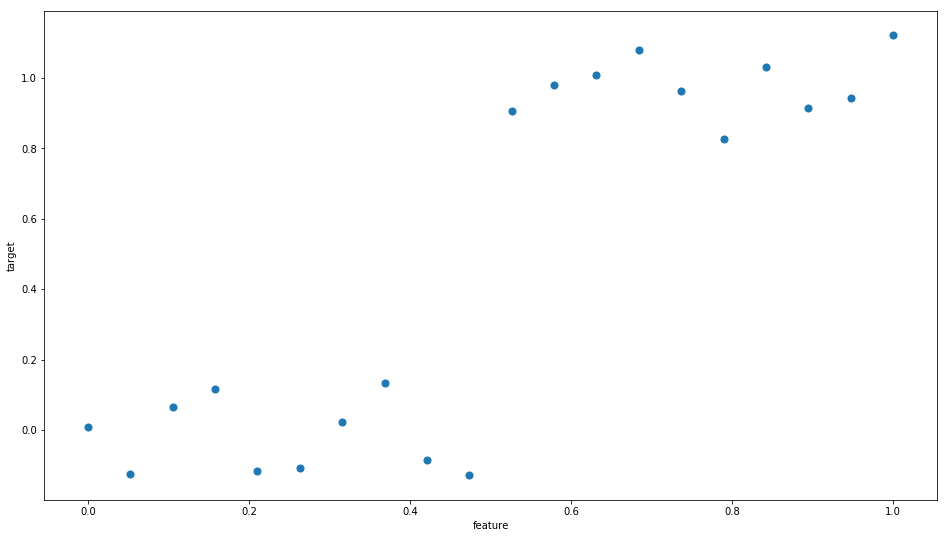

In [43]:
X_train = np.linspace(0, 1, 20) # мало точек, чтобы между точками были интервалы
X_test = np.linspace(0, 1, 1000) # много точек, чтобы получился график предсказаний

def target(x):
    return x > 0.5

Y_train = target(X_train) + np.random.randn(*X_train.shape) * 0.1

plt.figure(figsize = (16, 9))
plt.scatter(X_train, Y_train, s=50)
plt.xlabel("feature")
plt.ylabel("target")

Допишите функцию, которая берет на вход reg - объекта класса композиции (в качестве reg будет подаваться случайный лес или градиентный бустинг). Функция должна построить несколько графиков, каждый график визуализирует предсказания композиции из определенного числа деревьев. Следуйте комментариям в функции.

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, \
                             RandomForestRegressor
    
def train_and_plot(reg):
    plt.figure(figsize=(20, 30))
    sizes = [1, 2, 5, 20, 100, 500, 1000, 2000] # варианты числа деревьев
    for i, s in enumerate(sizes):
        reg.n_estimators = s # устанавливаем число деревьев
        plt.subplot(4, 2, i+1) # чтобы сделать много графиков
        plt.title('{} trees'.format(s)) # отмечаем число деревьев в названии графика
        ### далее ваш код
        # обучите reg по синим точам
        reg.fit(X_train.reshape(-1, 1), Y_train)
        # сделайте предсказания для всего отрезка [0, 1], он хранится в X_test
        Y_pred = reg.predict(X_test.reshape(-1, 1))
        # нарисуйте синие точки с помощью scatter
        plt.scatter(X_train, Y_train, s=30)
        # постройте график предсказаний с помощью plot
        plt.plot(X_test, Y_pred, c='green', linewidth=4)

Посмотрим, как изменяются предсказания случайного леса при увеличении числа деревьев:

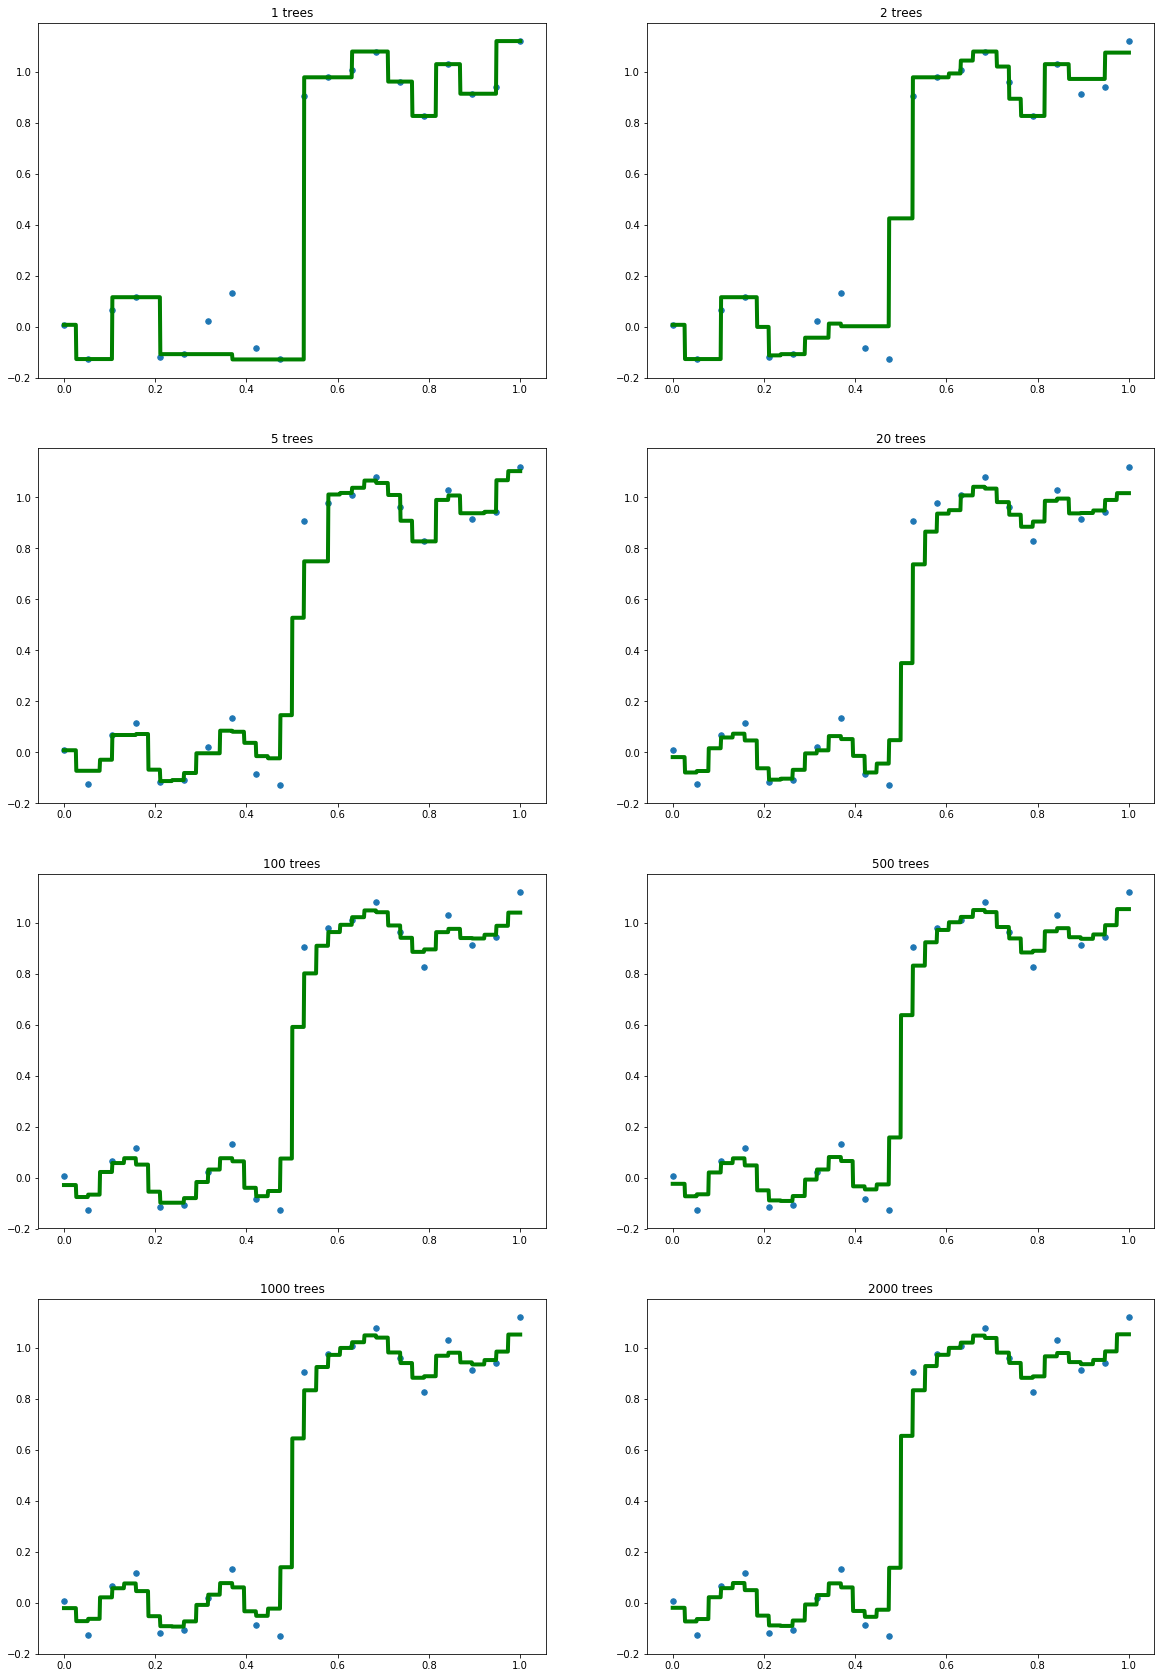

In [47]:
reg = RandomForestRegressor(warm_start=True)
train_and_plot(reg)

Можно заметить, что с некоторого момента итоговая функция перестает меняться с ростом количества деревьев.

Теперь проделаем то же самое для градинентного бустинга.

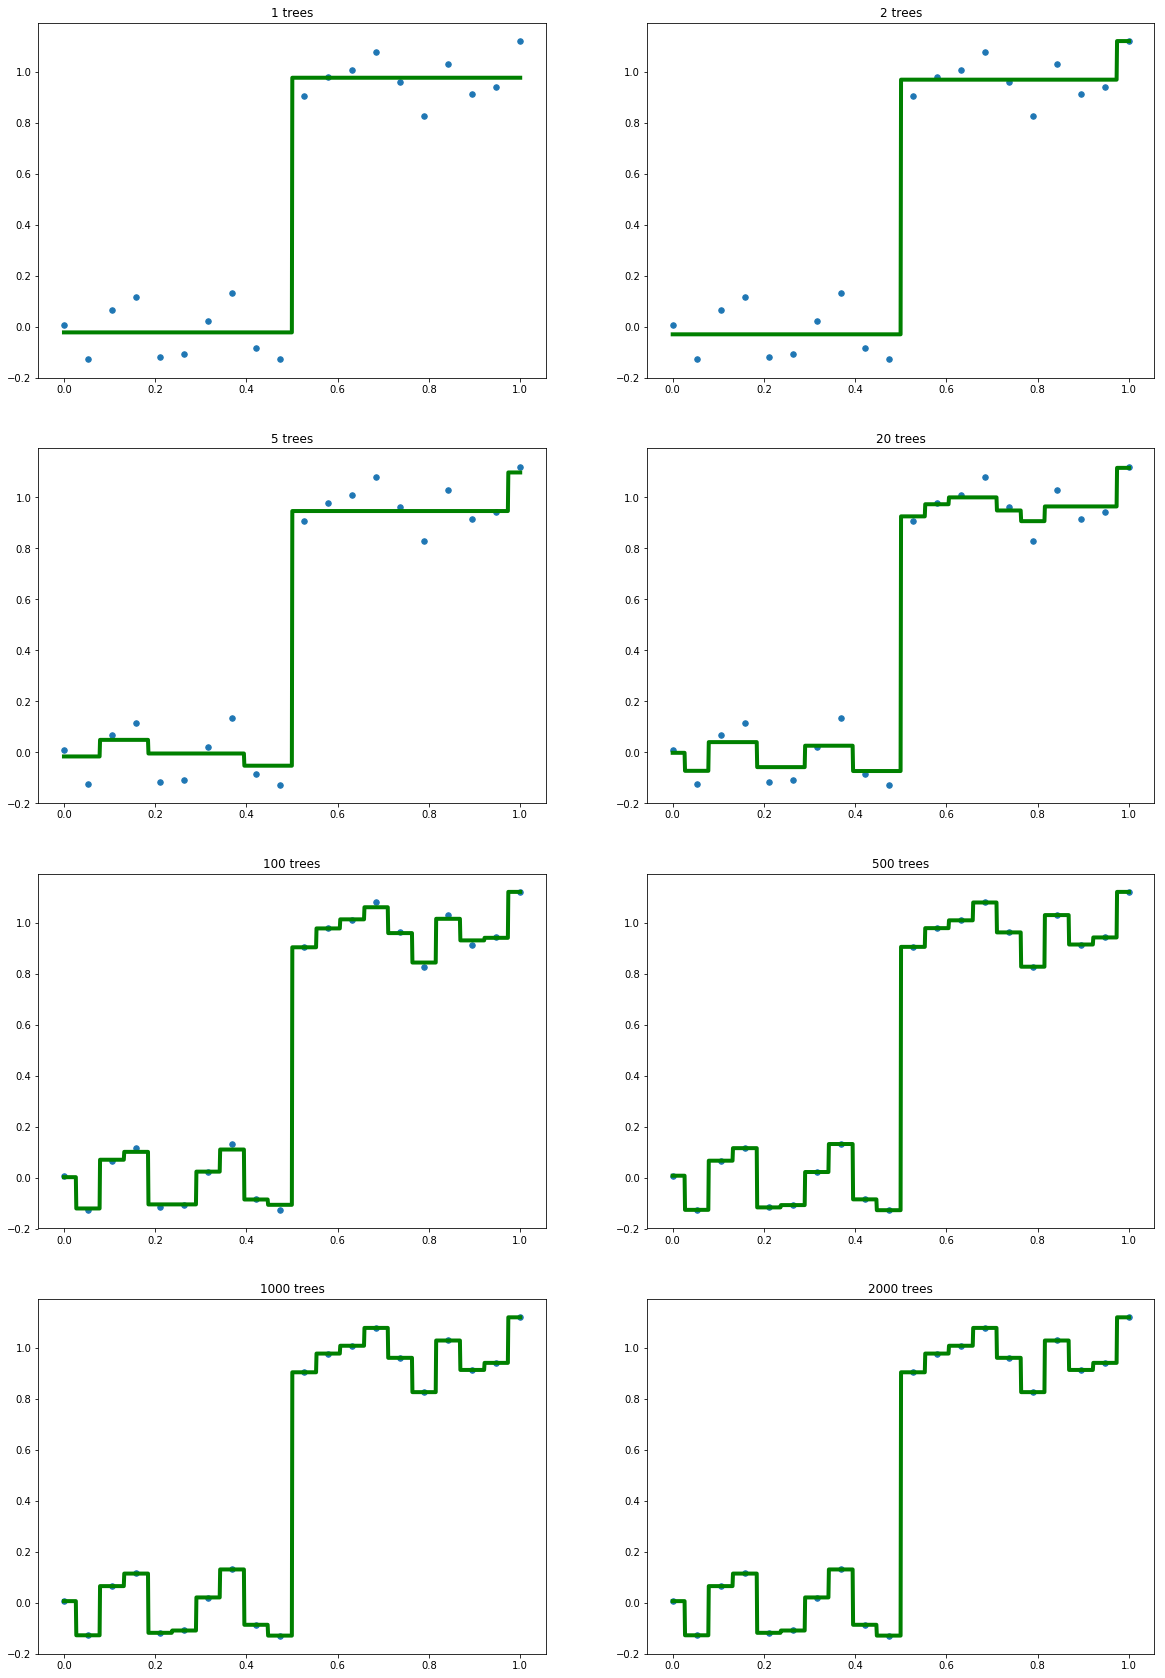

In [48]:
reg = GradientBoostingRegressor(max_depth=1, \
                                learning_rate=1, \
                                warm_start=True)
train_and_plot(reg)

Градиентный бустинг довольно быстро построил истинную зависимость, после чего начал настраиваться уже на конкретные объекты обучающей выборки, из-за чего сильно переобучился.


Бороться с этой проблемой можно с помощью выбора очень простого базового алгоритма или
же искусственным снижением веса новых алгоритмов при помощи шага $\eta$:
$$a_N(x) = \sum_{n=0}^N \eta \gamma_N b_n(x).$$

Такая поправка замедляет обучение по сравнению с бэггингом, но зато позволяет получить менее переобученный алгоритм. Тем не менее, важно понимать, что переобучение всё равно будет иметь место при обучении сколь угодно большого количества базовых алгоритмов для фиксированного $\eta$.

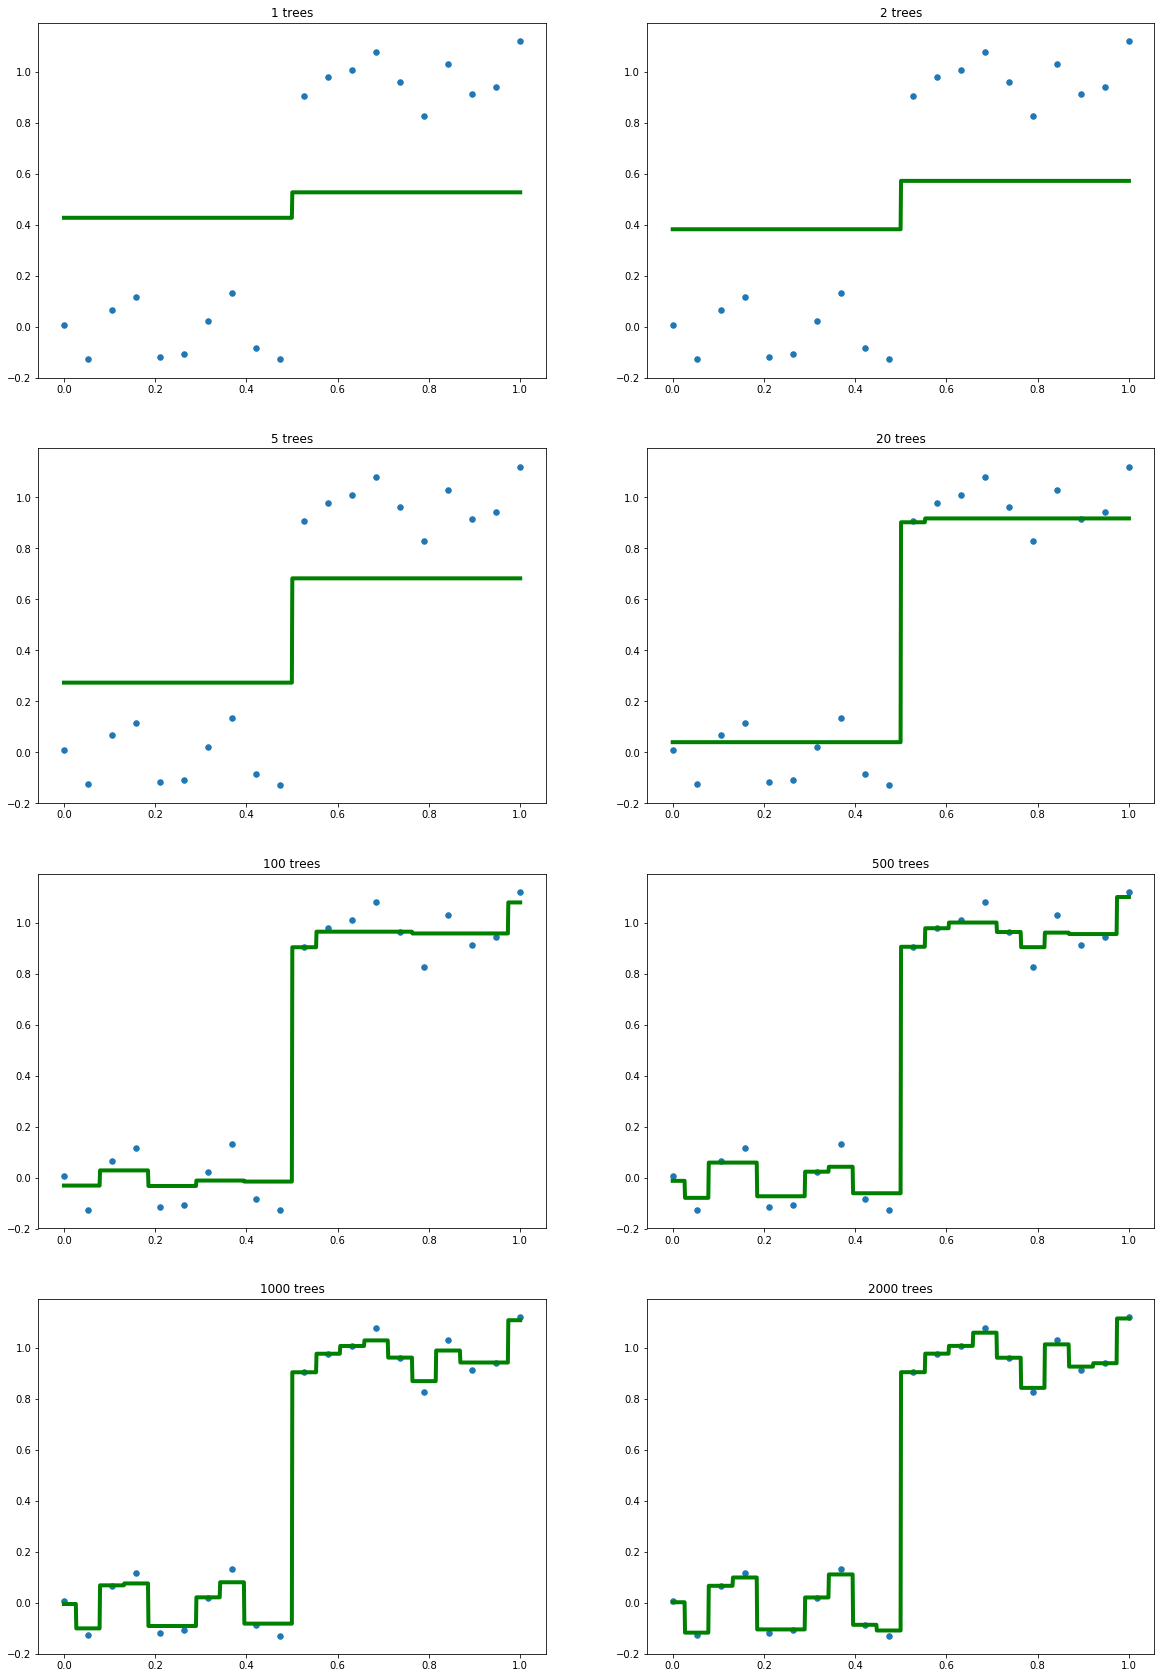

In [49]:
reg = GradientBoostingRegressor(max_depth=1, \
                                learning_rate=0.1, \
                                warm_start=True)
train_and_plot(reg)

С маленьким шагом градиентный бустинг переобучается медленнее, но при очень большом числе базовых алгоритмов все равно запоминает обучающую выборку.

Теперь проверим описанный выше эффект на реальных данных.

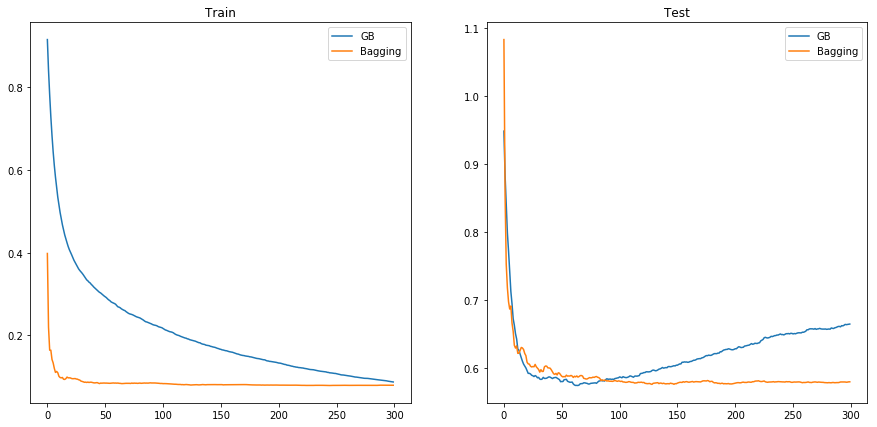

In [50]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

ds = datasets.load_diabetes()
X = ds.data
Y = ds.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, test_size=0.5)

MAX_ESTIMATORS = 300

gbclf = RandomForestRegressor(warm_start=True)
err_train_bag = []
err_test_bag = []
for i in range(1, MAX_ESTIMATORS+1):
    gbclf.n_estimators = i
    gbclf.fit(X_train, Y_train)
    err_train_bag.append(1 - gbclf.score(X_train, Y_train))
    err_test_bag.append(1 - gbclf.score(X_test, Y_test))
    
gbclf = GradientBoostingRegressor(warm_start=True, \
                                  max_depth=2, \
                                  learning_rate=0.1)
err_train_gb = []
err_test_gb = []
for i in range(1, MAX_ESTIMATORS+1):
    gbclf.n_estimators = i
    gbclf.fit(X_train, Y_train)
    err_train_gb.append(1 - gbclf.score(X_train, Y_train))
    err_test_gb.append(1 - gbclf.score(X_test, Y_test))
    
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(err_train_gb, label='GB')
plt.plot(err_train_bag, label='Bagging')
plt.legend()
plt.title('Train')
plt.subplot(1, 2, 2)
plt.plot(err_test_gb, label='GB')
plt.plot(err_test_bag, label='Bagging')
plt.legend()
plt.title('Test')
plt.gcf().set_size_inches(15, 7)